In [20]:
import librosa as librosa
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import librosa.display
import os

#### Load sample audio file and display the raw waveform (time domain)

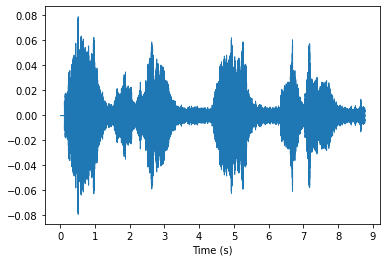

In [21]:
y, sr = librosa.load('h_1.wav', sr=32000)
librosa.display.waveshow(y, max_points=11025, x_axis='s')

#### Find the spectrogram. The outpt is a matrix. Refer to the sources below to learn more about the spectrograms
Important concepts to understand from the references below are Windowing, Short Term Fourier Transform (STFT)
https://www.phon.ucl.ac.uk/courses/spsci/acoustics/week1-10.pdf
https://download.ni.com/evaluation/pxi/Understanding%20FFTs%20and%20Windowing.pdf

In [22]:
# Size of the FFT, which will also be used as the window length
n_fft=2048

# Step or stride between windows. If the step is smaller than the window length, the windows will overlap
hop_length=512

# Calculate the spectrogram as the square of the complex magnitude of the STFT
spectrogram_librosa = np.abs(librosa.stft(y, n_fft=n_fft, hop_length=hop_length, win_length=n_fft, window='hann')) ** 2

print("The shape of spectrogram_librosa is: ", spectrogram_librosa.shape)

The shape of spectrogram_librosa is:  (1025, 378)


#### Display the spectrogram

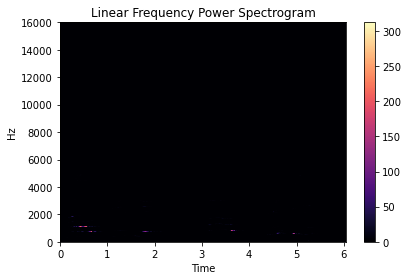

In [23]:
librosa.display.specshow(spectrogram_librosa, sr=sr, x_axis='time', y_axis='linear',hop_length=hop_length)
plt.title('Linear Frequency Power Spectrogram')
plt.colorbar()
plt.tight_layout()
plt.show()

#### We can now transform the spectrogram output to a logarithmic scale by transforming the amplitude to decibels. 
While doing so we will also normalize the spectrogram so that its maximum represent the 0 dB point.

The shape of spectogram is:  (1025, 378)


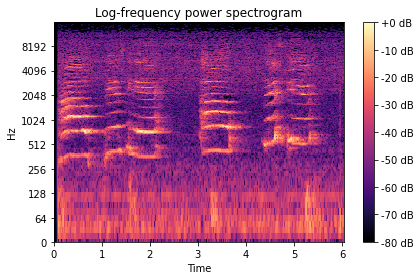

In [24]:
spectrogram_librosa_db = librosa.power_to_db(spectrogram_librosa, ref=np.max)
print("The shape of spectogram is: ", spectrogram_librosa_db.shape)

librosa.display.specshow(spectrogram_librosa_db, sr=sr, x_axis='time', y_axis='log',hop_length=hop_length)
plt.title('Log-frequency power spectrogram')
plt.colorbar(format="%+2.f dB")
plt.tight_layout()
plt.show()

#### Mel Spectrogram
The mel scale is a non-linear transformation of frequency scale based on the perception of pitches. The mel scale is calculated so that two pairs of frequencies separated by a delta in the mel scale are perceived by humans as being equidistant. 

In machine learning applications involving speech and audio, we typically want to represent the power spectrogram in the mel scale domain. We do that by applying a bank of overlapping triangular filters that compute the energy of the spectrum in each band. Typically, we want the mel spectrogram represented in decibels. 

More information can be found here:
https://docs.nvidia.com/deeplearning/dali/user-guide/docs/examples/audio_processing/spectrogram.html

In [27]:
mel_spectrogram_librosa = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128, fmax=8000)
mel_spectrogram_librosa_db = librosa.power_to_db(mel_spectrogram_librosa, ref=np.max)


#### Mel-Frequency Cepstral Coefficients (MFCCs)
MFCCs are an alternative representation of the Mel-frequency spectrogram often used in audio applications. The MFCCs are calculated by applying the discrete cosine transform (DCT) to a mel-frequency spectrogram.

In [28]:
mfccs_librosa = librosa.feature.mfcc(S=mel_spectrogram_librosa_db,
                                     dct_type=2, n_mfcc=40, norm='ortho', lifter=0)
